In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
all_data = pd.read_csv("C:\\Users\\KIRHIKAGURUMURTHY\\Desktop\\PES stuff\\Projects\\Sentiment\\sentiment_analysis\\World_map\\full_grouped.csv")


In [25]:
all_data.fillna(0)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Country_Region,Day_num
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,0,0
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,1,0
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,2,0
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,3,0
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28606,2020-06-22,West Bank and Gaza,1001,3,442,556,168,0,3,Eastern Mediterranean,182,152
28607,2020-06-22,Western Sahara,10,1,8,1,1,0,0,Africa,183,152
28608,2020-06-22,Yemen,967,257,350,360,26,1,3,Eastern Mediterranean,184,152
28609,2020-06-22,Zambia,1430,11,1194,225,0,0,0,Africa,185,152


In [33]:
gb = all_data.groupby('Country/Region')    
countries = [gb.get_group(x) for x in gb.groups]

In [82]:
len(countries)

187

In [71]:
data = all_data[['Country/Region','Confirmed','Deaths','Day_num']]
gb = data.groupby('Country/Region')    
countries = [gb.get_group(x) for x in gb.groups]
countries[0]

,Country/Region,Confirmed,Deaths,Day_num
0,Afghanistan,0,0,0
187,Afghanistan,0,0,1
374,Afghanistan,0,0,2
561,Afghanistan,0,0,3
748,Afghanistan,0,0,4
...,...,...,...,...
27676,Afghanistan,27532,546,148
27863,Afghanistan,27878,548,149
28050,Afghanistan,28424,569,150
28237,Afghanistan,28833,581,151


In [56]:
def logistic_function(t, a, b, c):
    return c / (1. + a*np.exp(-b*t))

In [57]:
p0 = np.random.exponential(size=3)
p0

array([1.72077202, 0.37128362, 1.00707773])

In [58]:
bounds = (0,[100000.,3.,1000000000.])

In [67]:
import scipy.optimize as optim
x = np.array(countries[20]['Day_num']) + 1
y = np.array(countries[20]['Confirmed'])

(a,b,c),cov = optim.curve_fit(logistic_function,x,y,bounds=bounds,p0=p0)

a,b,c

(37345.061397911624, 0.0707108297260438, 43323.31659784977)

In [68]:
def my_logistic(t):
    return c/(1 + a*np.exp(-b*t))

In [92]:
def plot_logistic_country(df):
    x = np.array(df['Day_num']) + 1
    y = np.array(df['Confirmed'])
    (a,b,c),cov = optim.curve_fit(logistic_function,x,y,bounds=bounds,p0=p0)
    plt.scatter(x,y)
    plt.plot(x,my_logistic(x))
    country_name = df['Country/Region']
    plt.title('Logistic Model vs Real Observations of Covid19 cases for'+str(country_name))
    plt.legend(['Logistic Model','Real data'])
    plt.xlabel('Time')
    plt.ylabel('Confirmed')
    return a,b,c

(43421.21834294146, 0.07873630891139441, 36847.36415896192)

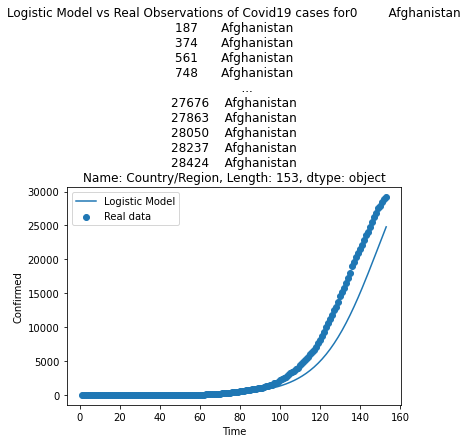

In [93]:
plot_logistic_country(countries[0]) # c = max limit for number of cases at time t = ln(a)/b and no of cases at t => y=c/2